# NYC Parking Tickets Case Study

**Completed by:**
* **Saad Syed Adeeb**
* **Anubhab Nath**

## Setting up Environment and importing required libraries 

In [1]:
from pyspark.sql import SparkSession
import pandas as pd
import matplotlib.pyplot as plt
spark = SparkSession \
    .builder \
    .appName("NYC Case Study SAAD_ANATH") \
    .getOrCreate()

## Loading the data 

In [2]:
nyc_parking = spark.read.format("csv").option("header", "true").option("inferSchema", "true").load('/common_folder/nyc_parking/Parking_Violations_Issued_-_Fiscal_Year_2017.csv')
nyc_parking

DataFrame[Summons Number: bigint, Plate ID: string, Registration State: string, Issue Date: timestamp, Violation Code: int, Vehicle Body Type: string, Vehicle Make: string, Violation Precinct: int, Issuer Precinct: int, Violation Time: string]

## Initial analysis of data

In [3]:
nyc_parking.show(5)

+--------------+--------+------------------+-------------------+--------------+-----------------+------------+------------------+---------------+--------------+
|Summons Number|Plate ID|Registration State|         Issue Date|Violation Code|Vehicle Body Type|Vehicle Make|Violation Precinct|Issuer Precinct|Violation Time|
+--------------+--------+------------------+-------------------+--------------+-----------------+------------+------------------+---------------+--------------+
|    5092469481| GZH7067|                NY|2016-07-10 00:00:00|             7|             SUBN|       TOYOT|                 0|              0|         0143A|
|    5092451658| GZH7067|                NY|2016-07-08 00:00:00|             7|             SUBN|       TOYOT|                 0|              0|         0400P|
|    4006265037| FZX9232|                NY|2016-08-23 00:00:00|             5|             SUBN|        FORD|                 0|              0|         0233P|
|    8478629828| 66623ME|         

In [4]:
nyc_parking.describe().show()

+-------+--------------------+--------+------------------+------------------+------------------+------------------+------------------+-----------------+-----------------+
|summary|      Summons Number|Plate ID|Registration State|    Violation Code| Vehicle Body Type|      Vehicle Make|Violation Precinct|  Issuer Precinct|   Violation Time|
+-------+--------------------+--------+------------------+------------------+------------------+------------------+------------------+-----------------+-----------------+
|  count|            10803028|10803028|          10803028|          10803028|          10803028|          10803028|          10803028|         10803028|         10803028|
|   mean|6.8174470290656595E9|Infinity|              99.0|34.599430455979565|3.9258887134586864| 6519.974025974026| 45.01216260848347|46.82931211508477|909.2857142857143|
| stddev| 2.320233962328229E9|     NaN|               0.0| 19.35986871632348|0.5013415469252523|18091.257389147086|40.552560268435805|62.66703577

In [5]:
nyc_parking.printSchema()

root
 |-- Summons Number: long (nullable = true)
 |-- Plate ID: string (nullable = true)
 |-- Registration State: string (nullable = true)
 |-- Issue Date: timestamp (nullable = true)
 |-- Violation Code: integer (nullable = true)
 |-- Vehicle Body Type: string (nullable = true)
 |-- Vehicle Make: string (nullable = true)
 |-- Violation Precinct: integer (nullable = true)
 |-- Issuer Precinct: integer (nullable = true)
 |-- Violation Time: string (nullable = true)



In [6]:
# rows
nyc_parking.count()

10803028

In [7]:
nyc_parking.columns

['Summons Number',
 'Plate ID',
 'Registration State',
 'Issue Date',
 'Violation Code',
 'Vehicle Body Type',
 'Vehicle Make',
 'Violation Precinct',
 'Issuer Precinct',
 'Violation Time']

#### Check and remove duplicates from dataset (if any)

In [8]:

nyc_parking=nyc_parking.dropDuplicates()
nyc_parking.count()

10803028

#### Count remains the same ,thus there are no duplicates in the dataset

#### Checking and removing null values(if any)

In [9]:
# Droping null values if any
nyc_parking=nyc_parking.dropna()
nyc_parking.count()

10803028

#### no null values to remove in NA
#### Since in spark we use sql queries it'll be easier if there are no spaces in between column names

In [10]:
nyc_parking= nyc_parking.toDF(*(c.replace(' ', '_') for c in nyc_parking.columns))
nyc_parking.show(5)

+--------------+--------+------------------+-------------------+--------------+-----------------+------------+------------------+---------------+--------------+
|Summons_Number|Plate_ID|Registration_State|         Issue_Date|Violation_Code|Vehicle_Body_Type|Vehicle_Make|Violation_Precinct|Issuer_Precinct|Violation_Time|
+--------------+--------+------------------+-------------------+--------------+-----------------+------------+------------------+---------------+--------------+
|    4634224008| AE75413|                CT|2017-05-22 00:00:00|            36|               4D|       NISSA|                 0|              0|         0100P|
|    4629644490| HHJ3068|                NY|2017-01-17 00:00:00|            36|             4DSD|       CHRYS|                 0|              0|         0100P|
|    5094523077| BK55073|                NY|2016-11-28 00:00:00|             7|             SEMI|       PINES|                 0|              0|         0101P|
|    4635330000| FJT8706|         

#### Creating a view to query the dataset using sql 

In [11]:
nyc_parking.createOrReplaceTempView("parking_info")

In [12]:
spark.sql('Select * from parking_info')

DataFrame[Summons_Number: bigint, Plate_ID: string, Registration_State: string, Issue_Date: timestamp, Violation_Code: int, Vehicle_Body_Type: string, Vehicle_Make: string, Violation_Precinct: int, Issuer_Precinct: int, Violation_Time: string]

In [13]:
# Total number of tickets for each year
ticket_year = spark.sql("select year(Issue_Date) as IssueYear, count(Summons_Number) as TicketsIssued from parking_info group by IssueYear order by IssueYear")
ticket_year.show(100)

+---------+-------------+
|IssueYear|TicketsIssued|
+---------+-------------+
|     1972|            2|
|     1973|            2|
|     1974|            1|
|     1976|            1|
|     1977|            1|
|     1984|            1|
|     1985|            1|
|     1990|            2|
|     1991|            3|
|     1994|            1|
|     1996|            1|
|     1997|            1|
|     2000|          185|
|     2001|            2|
|     2002|            1|
|     2003|            1|
|     2004|            2|
|     2005|            1|
|     2006|            8|
|     2007|           18|
|     2008|            4|
|     2009|            3|
|     2010|           48|
|     2011|           22|
|     2012|           87|
|     2013|           70|
|     2014|          120|
|     2015|          419|
|     2016|      5368391|
|     2017|      5431918|
|     2018|         1057|
|     2019|          472|
|     2020|           22|
|     2021|           22|
|     2022|            4|
|     2023| 

#### So we have data from 1972 to 2069,We are only going to consider the tickets issued over the year 2017. 

In [14]:
nyc_parking.createOrReplaceTempView("tickets_2017")
nyc_parking=spark.sql("select * from tickets_2017 where year(TO_DATE(CAST(UNIX_TIMESTAMP(Issue_Date,'MM/dd/yyyy') AS TIMESTAMP))) = 2017 ")
nyc_parking.count()

5431918

#### Creating a view to query the dataset using sql 

In [15]:
nyc_parking.createOrReplaceTempView("ticketinfo_2017")

In [16]:
#Showing distribution 
ticket_month_distribution= spark.sql("SELECT month(Issue_Date) as IssueMonth,count(*) as TicketsIssued FROM ticketinfo_2017 GROUP BY IssueMonth order by TicketsIssued desc")
ticket_month_distribution.show()

+----------+-------------+
|IssueMonth|TicketsIssued|
+----------+-------------+
|         5|      1020244|
|         3|       964737|
|         4|       888402|
|         1|       877365|
|         6|       852187|
|         2|       826967|
|         7|          370|
|         9|          367|
|        12|          358|
|        11|          338|
|         8|          309|
|        10|          274|
+----------+-------------+



**Maximum number of violations are in the month of May.One more point to note is the number tickets issued reduce drastically from July-Dec**

In [17]:
Freq_Violations_by_month = ticket_month_distribution.toPandas()

<Figure size 432x288 with 0 Axes>

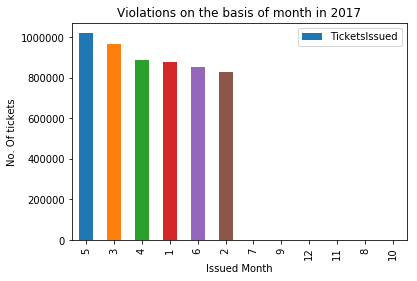

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
plt.clf()
Freq_Violations_by_month.plot(x= 'IssueMonth', y='TicketsIssued', kind='bar')
plt.title("Violations on the basis of month in 2017")
plt.xlabel('Issued Month')
plt.ylabel('No. Of tickets')
plt.show()

In [19]:
#Checking on Plate_ID field to know if there are cases with same plate id.

Plate_Id_Check=spark.sql("Select Plate_ID, count(*) as TicketsIssued from ticketinfo_2017 group by Plate_ID having count(*)>1 order by TicketsIssued desc")
Plate_Id_Check.show()

+----------+-------------+
|  Plate_ID|TicketsIssued|
+----------+-------------+
|BLANKPLATE|         5261|
|   96089MA|          529|
|   96087MA|          528|
|   94905JA|          527|
|   14828MJ|          526|
|   85848MD|          512|
|   30954JX|          510|
|   2121796|          507|
|   16242TC|          496|
|   2194153|          495|
|   77116MA|          493|
|   47603MD|          492|
|   12359MG|          474|
|   16208TC|          468|
|   49731MA|          464|
|   14829MJ|          460|
|    XEEF98|          458|
|   49331KA|          458|
|   2028685|          454|
|   66103JR|          452|
+----------+-------------+
only showing top 20 rows



**There is one value'BLANKPLATE' which we cannot infer anything from. Therefore, we will remove this.**

In [20]:
nyc_parking=nyc_parking[nyc_parking.Plate_ID!='BLANKPLATE']
nyc_parking.count()

5426657

#### Creating a view to query the dataset using sql 

In [21]:
nyc_parking.createOrReplaceTempView("ticketinfo_2017")

## Questions to Be Answered in the Analysis

### Examine the data

#### Q1. Find the total number of tickets for the year

In [22]:
query1=spark.sql("Select count(distinct(Summons_Number)) from ticketinfo_2017")
query1.show()

+------------------------------+
|count(DISTINCT Summons_Number)|
+------------------------------+
|                       5426657|
+------------------------------+



**Total number of tickets for the year 2017 are 5426657**

#### Q2. Find out the number of unique states from where the cars that got parking tickets came from. 

In [23]:
query2 = spark.sql("SELECT distinct(Registration_State), Count(*) as Number_of_Records from ticketinfo_2017 group by Registration_State order by Number_of_Records desc")
query2.count()

65

In [24]:
query2.show(10)

+------------------+-----------------+
|Registration_State|Number_of_Records|
+------------------+-----------------+
|                NY|          4273951|
|                NJ|           475825|
|                PA|           140286|
|                CT|            70403|
|                FL|            69468|
|                IN|            45525|
|                MA|            38941|
|                VA|            34367|
|                MD|            30213|
|                NC|            27152|
+------------------+-----------------+
only showing top 10 rows



#### There are  65 unique States.There is a numeric entry '99' in the column which should be corrected. We need to replace it with the state having maximum entries.
**As maximum number of tickets are issued in NY, We will replace 99 by NY**

In [25]:
from pyspark.sql.functions import when,lit
nyc_parking=nyc_parking.withColumn('Registration_State',when(nyc_parking["Registration_State"]=="99",lit('NY')).otherwise(nyc_parking["Registration_State"]))

In [26]:
nyc_parking.createOrReplaceTempView("ticketinfo_2017")

In [27]:
# Lets check again for number of distinct Registration_State.
query2=spark.sql("SELECT Registration_State, Count(*) as IssuedTickets from ticketinfo_2017 group by Registration_State order by IssuedTickets desc")
query2.count()

64

#### Therefore there  are 64 unique states in the dataset after cleaning the column Registration state
**Now let's plot this information and see what we can infer**

<Figure size 7200x14400 with 0 Axes>

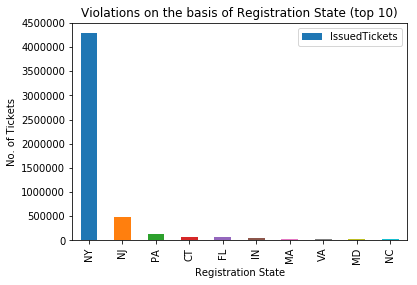

In [28]:
# plot violation on the basis of Registration State
q2_for_plot = query2.toPandas()
plt.figure(figsize=(100,200))
q2_for_plot.head(10).plot(x='Registration_State', y='IssuedTickets', kind='bar')
plt.title("Violations on the basis of Registration State (top 10)")
plt.xlabel('Registration State')
plt.ylabel('No. of Tickets')

plt.show()

**Therefore after examining the data we can conclude that there are total of 5426657 tickets issued in a total of 65 countries out of which maximum number of tickets have been issued in NY (New York)**

## Aggregation tasks

### Q1. How often does each violation code occur? Display the frequency of the top five violation codes.

In [29]:
query3_a = spark.sql("select Violation_Code,count(*) as TicketsIssued from ticketinfo_2017 group by Violation_Code order by count(*) desc")
query3_a.show()

+--------------+-------------+
|Violation_Code|TicketsIssued|
+--------------+-------------+
|            21|       767740|
|            36|       662765|
|            38|       541526|
|            14|       476405|
|            20|       319439|
|            46|       312168|
|            37|       293038|
|            40|       276905|
|            71|       263124|
|             7|       210176|
|            19|       148978|
|            70|       144242|
|            69|        96881|
|            31|        80528|
|            16|        74768|
|            47|        65427|
|            74|        57388|
|            50|        53710|
|             5|        48081|
|            48|        40970|
+--------------+-------------+
only showing top 20 rows



In [30]:
query3_b = spark.sql("select Violation_Code,count(*) as TicketsIssued from ticketinfo_2017 group by Violation_Code order by count(*) desc limit 5")
query3_b.show()

+--------------+-------------+
|Violation_Code|TicketsIssued|
+--------------+-------------+
|            21|       767740|
|            36|       662765|
|            38|       541526|
|            14|       476405|
|            20|       319439|
+--------------+-------------+



#### So it's evident that the violation codes 21,36,38,14,20 are are the top 5 viloation codes  and constitute approximately 51% of all tickets in the year 2017
#### Let's visualize the same to get the top violation code

<Figure size 432x288 with 0 Axes>

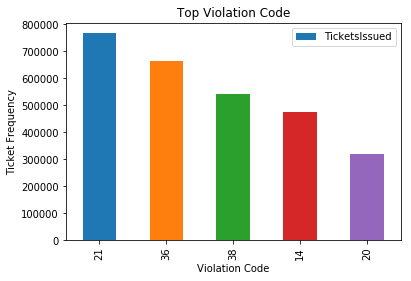

In [31]:
q3_for_plot = query3_b.toPandas()
plt.clf()
q3_for_plot.plot(x='Violation_Code', y='TicketsIssued', kind='bar')
plt.title("Top Violation Code")
plt.xlabel('Violation Code')
plt.ylabel('Ticket Frequency')
plt.show()

**Thus we can conclude that the violation code 21 is the maximum occuring violation for the year 2017 and also that 21,36,38,14,20 are are the top 5 viloation codes and constitute approximately 51% of all tickets in the year 2017**

### Q2. How often does each 'vehicle body type' get a parking ticket? How about the 'vehicle make'? 

In [32]:

query4_a = spark.sql("SELECT Vehicle_Body_Type, count(*) as IssuedTickets from ticketinfo_2017 group by Vehicle_Body_Type order by IssuedTickets desc")
query4_a.show(5)

+-----------------+-------------+
|Vehicle_Body_Type|IssuedTickets|
+-----------------+-------------+
|             SUBN|      1882978|
|             4DSD|      1547063|
|              VAN|       723796|
|             DELV|       358924|
|              SDN|       192927|
+-----------------+-------------+
only showing top 5 rows



In [33]:
query_4b =spark.sql("SELECT Vehicle_Make, count(*) as IssuedTickets from ticketinfo_2017 group by Vehicle_Make order by IssuedTickets desc")
query_4b.show(5)

+------------+-------------+
|Vehicle_Make|IssuedTickets|
+------------+-------------+
|        FORD|       636527|
|       TOYOT|       605011|
|       HONDA|       538460|
|       NISSA|       461725|
|       CHEVR|       355868|
+------------+-------------+
only showing top 5 rows



**Now that we have top 5 of both vehicle body type and vehicle make that have tickets issued, let's plot them and see what we can infer from it**

<Figure size 432x288 with 0 Axes>

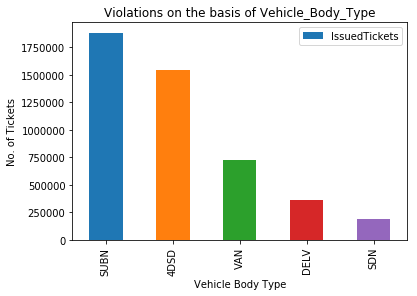

In [34]:
# plot Violations on the basis of Vehicle_Body_Type
vehicleBodyType_for_plot = query4_a.toPandas()
plt.clf()
vehicleBodyType_for_plot.head(5).plot(x='Vehicle_Body_Type', y='IssuedTickets', kind='bar')
plt.title("Violations on the basis of Vehicle_Body_Type")
plt.xlabel('Vehicle Body Type')
plt.ylabel('No. of Tickets')
plt.show()

**We can see that SUBN vehicle body type has the maximum number of tickets issued.**

<Figure size 432x288 with 0 Axes>

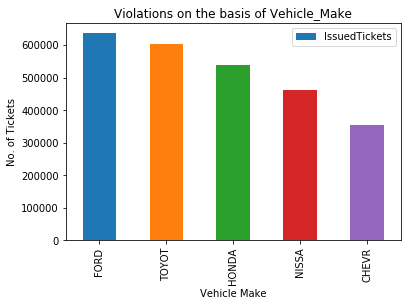

In [35]:
# plot Violations on the basis of Vehicle_Make
vehicleMake_for_plot = query_4b.toPandas()
plt.clf()
vehicleMake_for_plot.head(5).plot(x='Vehicle_Make', y='IssuedTickets', kind='bar')
plt.title("Violations on the basis of Vehicle_Make")
plt.xlabel('Vehicle Make')
plt.ylabel('No. of Tickets')
plt.show()

**We can conclude FORD vehicle make is issued the maximum number of tickets**

**Thus we can conclude that SUBN,4DSD,VAN,DELV,SDN and FORD TOYOT HONDA NISSA CHEVR are the top 5 vehicle body type and vehicle make respectively which get the most tickets issued and SUBN and FORD are the top vehicle body and vehicle make respectively with the highest tickets issued.**

### Q3 :  A precinct is a police station that has a certain zone of the city under its command.Find the (5 highest) frequency of tickets for each of the following:
#### 1.'Violation Precinct' (this is the precinct of the zone where the violation occurred). Using this, can you make any insights for parking violations in any specific areas of the city?

In [36]:
query5_a = spark.sql("SELECT Violation_Precinct, count(*) as IssuedTickets from ticketinfo_2017 group by Violation_Precinct order by IssuedTickets desc")
query5_a.show(5)

+------------------+-------------+
|Violation_Precinct|IssuedTickets|
+------------------+-------------+
|                 0|       925395|
|                19|       274264|
|                14|       203375|
|                 1|       174620|
|                18|       169043|
+------------------+-------------+
only showing top 5 rows



#### Here, it is observed that the dataframe has the'Violating Precinct' as '0'. These are erroneous entries. Hence, we need to provide the records for five correct precincts. Therefore we shall print the top 6 

In [37]:
query5_a.show(6)

+------------------+-------------+
|Violation_Precinct|IssuedTickets|
+------------------+-------------+
|                 0|       925395|
|                19|       274264|
|                14|       203375|
|                 1|       174620|
|                18|       169043|
|               114|       147223|
+------------------+-------------+
only showing top 6 rows



**Thus we see that precint 19 has maximum number of tickets issued in that zone (we will ignore 0 as that is an erroneous value entered)**

#### 2) Issuer Precinct' (This is the precinct that issued the ticket.) 
 **We will print top 6 as 0 may be present in this collumn as well** 

In [38]:
query5_b = spark.sql("SELECT Issuer_Precinct, count(*) as IssuedTickets from ticketinfo_2017 group by Issuer_Precinct order by IssuedTickets desc")
query5_b.show(6)

+---------------+-------------+
|Issuer_Precinct|IssuedTickets|
+---------------+-------------+
|              0|      1077884|
|             19|       266790|
|             14|       200328|
|              1|       168630|
|             18|       162908|
|            114|       143900|
+---------------+-------------+
only showing top 6 rows



**It is interesting to note that the precint 19 is leading with the number of issued tickets as well**
**now let's plot these values and see what we can infer**

<Figure size 432x288 with 0 Axes>

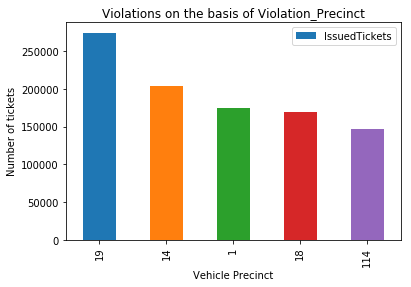

In [39]:
Violation_Precinct_for_plot = query5_a.toPandas()
plt.clf()
Violation_Precinct_for_plot[Violation_Precinct_for_plot.Violation_Precinct!=0].head(5).plot(x='Violation_Precinct', y='IssuedTickets', kind='bar')
plt.title("Violations on the basis of Violation_Precinct")
plt.xlabel('Vehicle Precinct')
plt.ylabel('Number of tickets')
plt.show()

<Figure size 432x288 with 0 Axes>

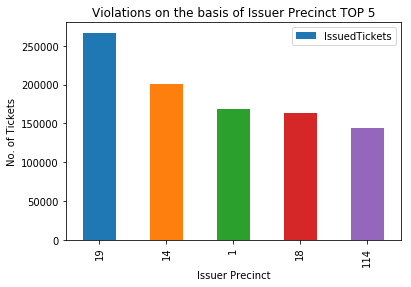

In [40]:
# plot Violations on the basis of Issue_Precinct
Issue_Precinct_for_plot = query5_b.toPandas()
plt.clf()
Issue_Precinct_for_plot[Issue_Precinct_for_plot.Issuer_Precinct!=0].head(5).plot(x='Issuer_Precinct', y='IssuedTickets', kind='bar')
plt.title("Violations on the basis of Issuer Precinct TOP 5")
plt.xlabel('Issuer Precinct')
plt.ylabel('No. of Tickets')
plt.show()

**Thus we conclude that  the top 5 area where most violation occurs are 19, 14, 1, 18 and  114.**
**Similarily,  the top 5 Issuer Precinct are 19, 14, 1, 18 and  114**
**Interesting point to note here the violation precint and issuer precinct frequencies follow the same order of frequency of tickets and precinct 19 is the highest ticket issued to as well as the maximum number of tickets issued in the area**  

### Q4. Find the violation code frequency across three precincts which have issued the most number of tickets.Do these precinct zones have an exceptionally high frequency of certain violation codes? Are these codes common across precincts? Hint: In the SQL view, use the 'where' attribute to filter among three precincts

In [41]:
query6_a = spark.sql("select Issuer_Precinct,Violation_Code, count(*) as TicketsIssued from ticketinfo_2017 group by Issuer_Precinct, Violation_Code order by TicketsIssued desc" )
query6_a.show(7)

+---------------+--------------+-------------+
|Issuer_Precinct|Violation_Code|TicketsIssued|
+---------------+--------------+-------------+
|              0|            36|       662765|
|              0|             7|       210175|
|              0|            21|       125923|
|             18|            14|        50135|
|             19|            46|        48422|
|              0|             5|        48076|
|             14|            14|        45019|
+---------------+--------------+-------------+
only showing top 7 rows



**We will not be  considering 0. Therefore 18,19,14 are the three issuer precincts which have the  maximum number of violations.**
**Lets analyze  the Issuer Precincts one by one**
#### Issuer Precinct 18

In [42]:

violation_code_freq_18 = spark.sql("select Violation_Code, count(*) as TicketsIssued from ticketinfo_2017 where Issuer_Precinct=18 group by Violation_Code order by TicketsIssued desc" )
violation_code_freq_18.show(10)

+--------------+-------------+
|Violation_Code|TicketsIssued|
+--------------+-------------+
|            14|        50135|
|            69|        20188|
|            47|        14105|
|            31|        11887|
|            46|         7861|
|            42|         6189|
|            38|         6157|
|            84|         5188|
|            19|         4580|
|            20|         4109|
+--------------+-------------+
only showing top 10 rows



**Violation code 14,69,47 are the top 3 codes for issuer precinct 18**
#### Issuer Precinct 19

In [43]:
violation_code_freq_19 = spark.sql("select Violation_Code, count(*) as TicketsIssued from ticketinfo_2017 where Issuer_Precinct=19 group by Violation_Code order by TicketsIssued desc" )
violation_code_freq_19.show(10)

+--------------+-------------+
|Violation_Code|TicketsIssued|
+--------------+-------------+
|            46|        48422|
|            38|        36332|
|            37|        36046|
|            14|        29791|
|            21|        28409|
|            20|        14624|
|            40|        11408|
|            16|         9921|
|            71|         7489|
|            19|         6854|
+--------------+-------------+
only showing top 10 rows



**Violation code 46,38,37 are the top 3 codes for issuer precinct 19**
#### Issuer Precinct 14

In [44]:
violation_code_freq_14 = spark.sql("select Violation_Code, count(*) as TicketsIssued from ticketinfo_2017 where Issuer_Precinct=14 group by Violation_Code order by TicketsIssued desc" )
violation_code_freq_14.show(10)

+--------------+-------------+
|Violation_Code|TicketsIssued|
+--------------+-------------+
|            14|        45019|
|            69|        30453|
|            31|        22528|
|            47|        18357|
|            42|        10022|
|            46|         7675|
|            19|         7031|
|            84|         6739|
|            82|         5052|
|            40|         3581|
+--------------+-------------+
only showing top 10 rows



**Violation code 14,69,31 are the top 3 codes for issuer precinct 14**
#### Common codes accross precincts 

In [45]:
query6_b =spark.sql("select Issuer_Precinct,Violation_Code, count(*) as TicketsIssued from ticketinfo_2017 where Issuer_Precinct in (18,19,14) group by Issuer_Precinct,Violation_Code order by TicketsIssued desc")
query6_b.show(20)

+---------------+--------------+-------------+
|Issuer_Precinct|Violation_Code|TicketsIssued|
+---------------+--------------+-------------+
|             18|            14|        50135|
|             19|            46|        48422|
|             14|            14|        45019|
|             19|            38|        36332|
|             19|            37|        36046|
|             14|            69|        30453|
|             19|            14|        29791|
|             19|            21|        28409|
|             14|            31|        22528|
|             18|            69|        20188|
|             14|            47|        18357|
|             19|            20|        14624|
|             18|            47|        14105|
|             18|            31|        11887|
|             19|            40|        11408|
|             14|            42|        10022|
|             19|            16|         9921|
|             18|            46|         7861|
|            

**we can observe that precinct 18 and 14 have the same highest frequency of 2 codes 14,69 whereas precinct 19 doesn't share any common codes with either of the other precincts highest frequency codes**
**Lets plot this and see what we can infer**

<Figure size 432x288 with 0 Axes>

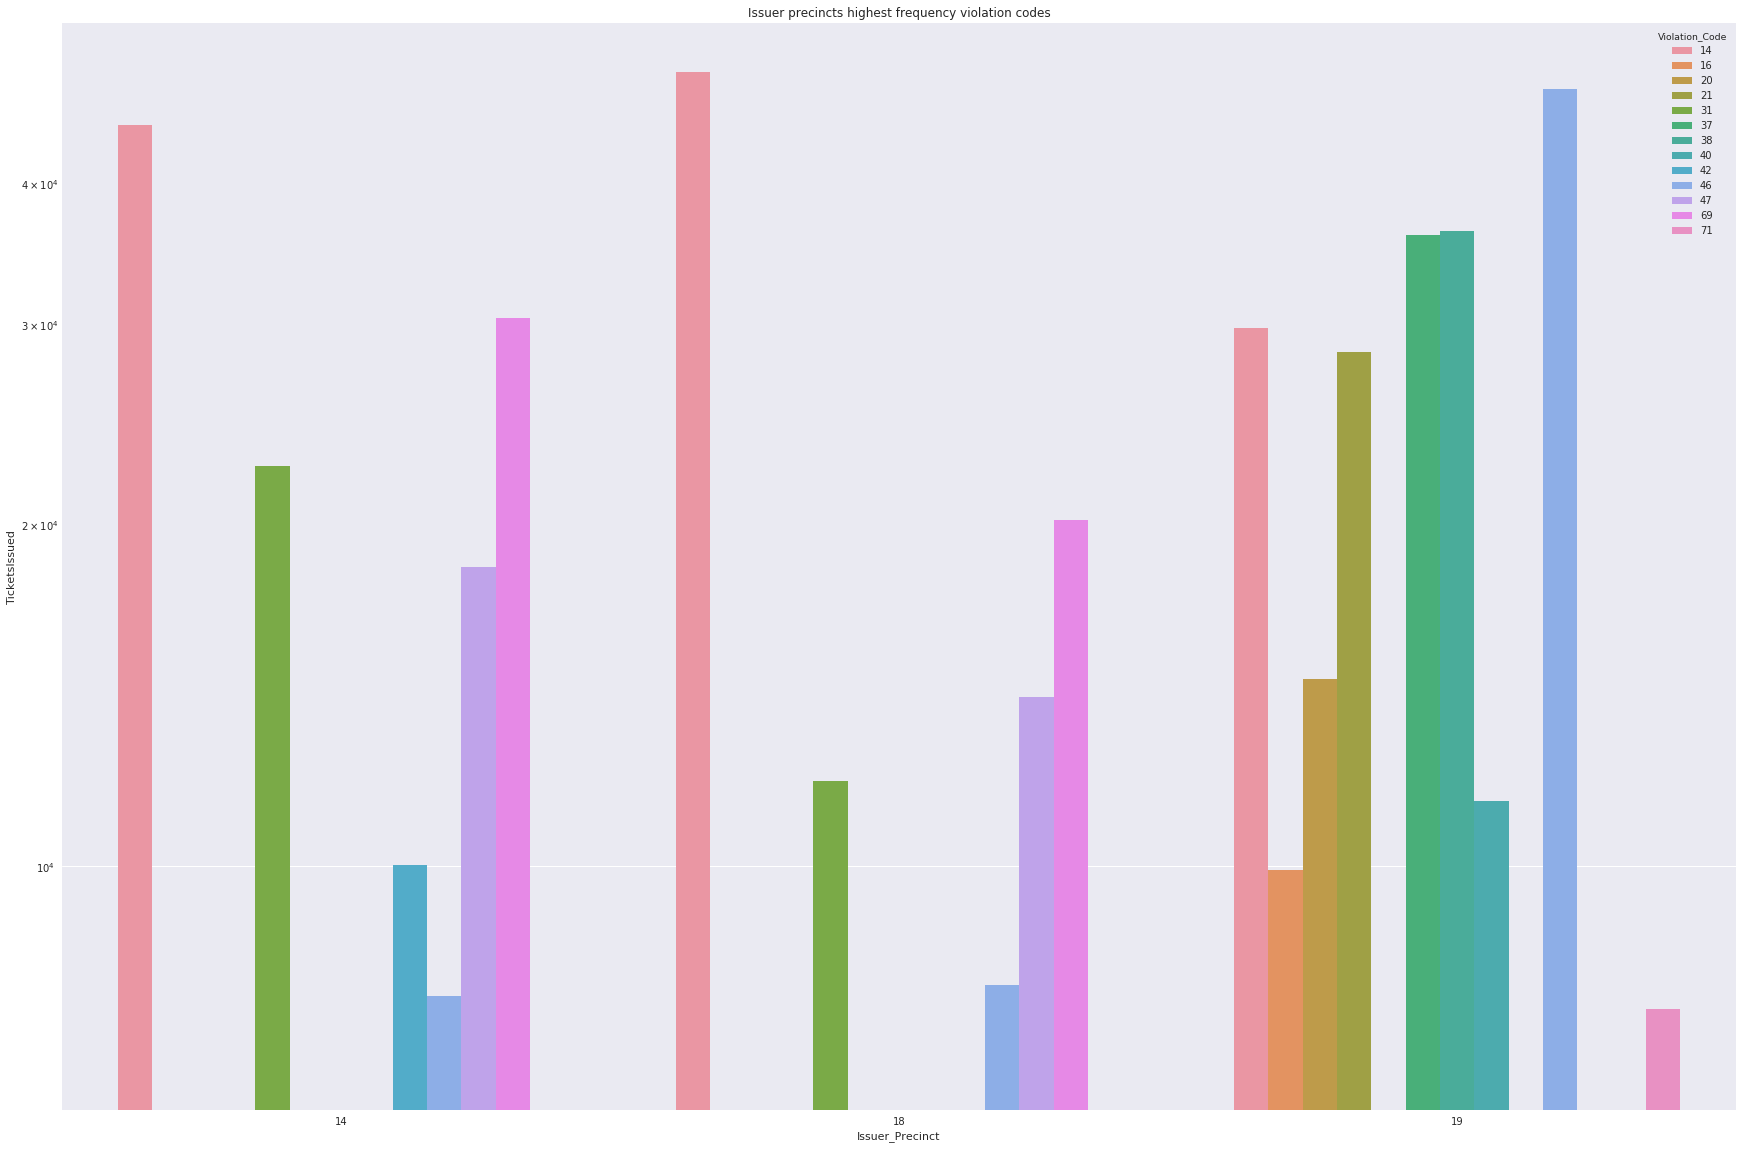

In [46]:
import seaborn as sns; sns.set()
Issuer_Precinct_ViolationCode = query6_b.toPandas()
plt.clf()
plt.figure(figsize=(30,20))
plt.title("Issuer precincts highest frequency violation codes")
plt.xlabel('Issuer Precinct')
plt.ylabel('No. of Tickets')
plt.yscale("log")
ax = sns.barplot(x="Issuer_Precinct", y="TicketsIssued", hue="Violation_Code", data=Issuer_Precinct_ViolationCode[Issuer_Precinct_ViolationCode.Issuer_Precinct!=0].head(20))
plt.show()

Therefore we can conclude the following:
    
**Precinct 18 and Precinct 14 has more  or less similar top violation code.**
**But Precinct 19 has very different top violation code.**

### Q5.Find out the properties of parking violations across different times of the day:

- Find a way to deal with missing values, if any.
(Hint: Check for the null values using 'isNull' under the SQL. Also, to remove the null values, check the 'dropna' command in the API documentation.)

- The Violation Time field is specified in a strange format. Find a way to make this a time attribute that you can use to divide into groups.

- Divide 24 hours into six equal discrete bins of time. Choose the intervals as you see fit. For each of these groups, find the three most commonly occurring violations.
(Hint: Use the CASE-WHEN in SQL view to segregate into bins. To find the most commonly occurring violations, you can use an approach similar to the one mentioned in the hint for question 4.)

- Now, try another direction. For the three most commonly occurring violation codes, find the most common time of the day (in terms of the bins from the previous part).

In [47]:
query7_a = spark.sql("SELECT count(*) as NumOfRecords from ticketinfo_2017 WHERE Violation_Time is NULL")
query7_a.show()

+------------+
|NumOfRecords|
+------------+
|           0|
+------------+



In [48]:
from pyspark.sql.functions import col
nyc_parking.where(col("Violation_Time").isNull()).show()

+--------------+--------+------------------+----------+--------------+-----------------+------------+------------------+---------------+--------------+
|Summons_Number|Plate_ID|Registration_State|Issue_Date|Violation_Code|Vehicle_Body_Type|Vehicle_Make|Violation_Precinct|Issuer_Precinct|Violation_Time|
+--------------+--------+------------------+----------+--------------+-----------------+------------+------------------+---------------+--------------+
+--------------+--------+------------------+----------+--------------+-----------------+------------+------------------+---------------+--------------+



**To Divide 24 hours into six equal discrete bins of time, we need to first convert violation time given to a correct format , we can do this by using substring**

In [49]:
query7_b=spark.sql("SELECT Summons_Number, Violation_Code , Violation_Time, Issuer_Precinct, case when substring(Violation_Time,1,2) in ('00','01','02','03','12') and upper(substring(Violation_Time,-1))='A' then 1 when substring(Violation_Time,1,2) in ('04','05','06','07') and upper(substring(Violation_Time,-1))='A' then 2 when substring(Violation_Time,1,2) in ('08','09','10','11') and upper(substring(Violation_Time,-1))='A' then 3 when substring(Violation_Time,1,2) in ('12','00','01','02','03') and upper(substring(Violation_Time,-1))='P' then 4 when substring(Violation_Time,1,2) in ('04','05','06','07') and upper(substring(Violation_Time,-1))='P' then 5 when substring(Violation_Time,1,2) in ('08','09','10','11') and upper(substring(Violation_Time,-1))='P' then 6 else null end as Violation_Time_bin from ticketinfo_2017 where Violation_Time is not null or (length(Violation_Time)=5 and upper(substring(Violation_Time,-1)) in ('A','P') and substring(Violation_Time,1,2) in ('00','01','02','03','04','05','06','07', '08','09','10','11','12'))")
query7_b.show()          

+--------------+--------------+--------------+---------------+------------------+
|Summons_Number|Violation_Code|Violation_Time|Issuer_Precinct|Violation_Time_bin|
+--------------+--------------+--------------+---------------+------------------+
|    8523552492|            38|         1055A|             52|                 3|
|    8539069866|            21|         1206P|             94|                 4|
|    8486072323|            14|         1029A|             14|                 3|
|    8566105485|            78|         0938P|            107|                 6|
|    8515117083|            21|         0915A|             30|                 3|
|    8506703712|            20|         0830A|              5|                 3|
|    8443544983|            14|         1234P|             66|                 4|
|    8566302783|            85|         0257A|            104|                 1|
|    8537963938|            21|         1005A|             94|                 3|
|    1419675813|

#### Details of the Bins

    Bin       Time Interval
    1         12:00 AM to 4:00 AM
    2         4:00 AM to 8:00 AM
    3         8:00 AM to 12:00 PM
    4         12:00 PM to 4:00 PM
    5         4:00 PM to 8:00 PM
    6         8:00 PM to 12:00 AM

In [50]:
query7_b.createOrReplaceTempView("ticketinfo_2017_bins")

**Now let's see the top 3 violation codes of each bin**

In [51]:
bin1 = spark.sql("select Violation_Code,count(*) TicketsIssued from ticketinfo_2017_bins where Violation_Time_bin == 1 group by Violation_Code order by TicketsIssued desc")
bin1.show(3)

+--------------+-------------+
|Violation_Code|TicketsIssued|
+--------------+-------------+
|            21|        36934|
|            40|        25810|
|            78|        15513|
+--------------+-------------+
only showing top 3 rows



In [52]:
bin2 = spark.sql("select Violation_Code,count(*) TicketsIssued from ticketinfo_2017_bins where Violation_Time_bin == 2 group by Violation_Code order by TicketsIssued desc")
bin2.show(3)

+--------------+-------------+
|Violation_Code|TicketsIssued|
+--------------+-------------+
|            14|        74095|
|            40|        60609|
|            21|        57876|
+--------------+-------------+
only showing top 3 rows



In [53]:
bin3 = spark.sql("select Violation_Code,count(*) TicketsIssued from ticketinfo_2017_bins where Violation_Time_bin == 3 group by Violation_Code order by TicketsIssued desc")
bin3.show(3)

+--------------+-------------+
|Violation_Code|TicketsIssued|
+--------------+-------------+
|            21|       597827|
|            36|       348165|
|            38|       176310|
+--------------+-------------+
only showing top 3 rows



In [54]:
bin4 = spark.sql("select Violation_Code,count(*) TicketsIssued from ticketinfo_2017_bins where Violation_Time_bin == 4 group by Violation_Code order by TicketsIssued desc")
bin4.show(3)

+--------------+-------------+
|Violation_Code|TicketsIssued|
+--------------+-------------+
|            36|       286284|
|            38|       240511|
|            37|       166969|
+--------------+-------------+
only showing top 3 rows



In [55]:
bin5 = spark.sql("select Violation_Code,count(*) TicketsIssued from ticketinfo_2017_bins where Violation_Time_bin == 5 group by Violation_Code order by TicketsIssued desc")
bin5.show(3)

+--------------+-------------+
|Violation_Code|TicketsIssued|
+--------------+-------------+
|            38|       102784|
|            14|        75856|
|            37|        70317|
+--------------+-------------+
only showing top 3 rows



In [56]:
bin6 = spark.sql("select Violation_Code,count(*) TicketsIssued from ticketinfo_2017_bins where Violation_Time_bin == 6 group by Violation_Code order by TicketsIssued desc")
bin6.show(3)

+--------------+-------------+
|Violation_Code|TicketsIssued|
+--------------+-------------+
|             7|        26293|
|            40|        22301|
|            14|        21026|
+--------------+-------------+
only showing top 3 rows



**Now that we know the top 3 violation code for each time period**

**Now, try another direction. For the three most commonly occurring violation codes, find the most common time of the day (in terms of the bins from the previous part).**

In [57]:
time_bin = spark.sql("select Violation_Time_bin, count(*) TicketsIssued from ticketinfo_2017_bins where Violation_Code in (21, 36, 38) group by Violation_Time_bin order by TicketsIssued desc")
time_bin.show(3)

+------------------+-------------+
|Violation_Time_bin|TicketsIssued|
+------------------+-------------+
|                 3|      1122302|
|                 4|       601432|
|                 5|       116574|
+------------------+-------------+
only showing top 3 rows



**Bins 3, 4, 5 are having most violations**

The most obvious reason would be that during day time there's more viloations

### Q6.Let’s try and find some seasonality in this data:

#### a)First, divide the year into some number of seasons,and find frequencies of tickets for each season.

In [58]:
query8_a = spark.sql("select Violation_Code , Issuer_Precinct, case when MONTH(TO_DATE(Issue_Date, 'MM/dd/yyyy')) between 03 and 05 then 'spring' when MONTH(TO_DATE(Issue_Date, 'MM/dd/yyyy')) between 06 and 08 then 'summer' when MONTH(TO_DATE(Issue_Date, 'MM/dd/yyyy')) between 09 and 11 then 'autumn' when MONTH(TO_DATE(Issue_Date, 'MM/dd/yyyy')) in (1,2,12) then 'winter' else 'unknown' end  as season from ticketinfo_2017")
query8_a.show()

+--------------+---------------+------+
|Violation_Code|Issuer_Precinct|season|
+--------------+---------------+------+
|            36|              0|summer|
|            36|              0|summer|
|            48|             78|spring|
|            71|             72|spring|
|            14|            112|spring|
|            71|             67|summer|
|            42|              1|winter|
|            14|             63|winter|
|            36|              0|spring|
|            46|             71|summer|
|            71|             66|winter|
|            14|             84|summer|
|            40|             23|spring|
|            37|            977|spring|
|            20|            114|spring|
|            31|             13|summer|
|            21|             42|spring|
|             7|              0|spring|
|            37|             19|winter|
|            37|            106|spring|
+--------------+---------------+------+
only showing top 20 rows



#### Season Binning Details

    Season    Month interval
    
    spring    March, April, May
    summer    June, July, August
    autumn    September, October, November
    winter    December, January, February

In [59]:
query8_a.createOrReplaceTempView("ticketseason_2017_bins")

In [60]:
tickets_seasonality_freq = spark.sql("select season, count(*) as TicketsIssued from ticketseason_2017_bins group by season order by TicketsIssued desc")
tickets_seasonality_freq.show()

+------+-------------+
|season|TicketsIssued|
+------+-------------+
|spring|      2870491|
|winter|      1702786|
|summer|       852405|
|autumn|          975|
+------+-------------+



In [61]:
# Spring season
violation_spring = spark.sql("select Violation_Code, count(*) as TicketsIssued from ticketseason_2017_bins where Issuer_Precinct in (19, 14, 1) and season = 'spring' group by Violation_Code order by TicketsIssued desc" )
violation_spring.show(3)

+--------------+-------------+
|Violation_Code|TicketsIssued|
+--------------+-------------+
|            14|        61633|
|            46|        37732|
|            38|        25511|
+--------------+-------------+
only showing top 3 rows



In [62]:
# Winter season
violation_winter = spark.sql("select Violation_Code, count(*) as TicketsIssued from ticketseason_2017_bins where Issuer_Precinct in (19, 14, 1) and season = 'winter' group by Violation_Code order by TicketsIssued desc" )
violation_winter.show(3)

+--------------+-------------+
|Violation_Code|TicketsIssued|
+--------------+-------------+
|            14|        32824|
|            46|        20148|
|            38|        14885|
+--------------+-------------+
only showing top 3 rows



In [63]:
# Summer season
violation_summer = spark.sql("select Violation_Code, count(*) as TicketsIssued from ticketseason_2017_bins where Issuer_Precinct in (19, 14, 1) and season = 'summer' group by Violation_Code order by TicketsIssued desc" )
violation_summer.show(3)

+--------------+-------------+
|Violation_Code|TicketsIssued|
+--------------+-------------+
|            14|        18689|
|            46|        10945|
|            20|        10393|
+--------------+-------------+
only showing top 3 rows



In [64]:
# Autumn season
violation_autumn = spark.sql("select Violation_Code, count(*) as TicketsIssued from ticketseason_2017_bins where Issuer_Precinct in (19, 14, 1) and season = 'autumn' group by Violation_Code order by TicketsIssued desc" )
violation_autumn.show(3)

+--------------+-------------+
|Violation_Code|TicketsIssued|
+--------------+-------------+
|            46|           15|
|            14|            9|
|             9|            3|
+--------------+-------------+
only showing top 3 rows



### Q7. The fines collected from all the instances of parking violation constitute a source of revenue for the NYC Police Department. Let’s take an example of estimating this for the three most commonly occurring codes:

#### a). Find total occurrences of the three most common violation codes

In [65]:
query9_a = spark.sql("select Violation_Code, count(*) as TicketsIssued from ticketinfo_2017 group by Violation_Code order by TicketsIssued desc")
query9_a.show(3)

+--------------+-------------+
|Violation_Code|TicketsIssued|
+--------------+-------------+
|            21|       767740|
|            36|       662765|
|            38|       541526|
+--------------+-------------+
only showing top 3 rows



#### b). Using this information, find the total amount collected for the three violation codes with maximum tickets. State the code which has the highest total collection.

In [71]:
from pyspark.sql.functions import when

query9_b=query9_a.withColumn("fine",when(query9_a.Violation_Code == 21, (query9_a.TicketsIssued) *55).otherwise((query9_a.TicketsIssued)*50))
query9_b.show(3)

AttributeError: 'NoneType' object has no attribute '_jvm'

In [69]:
print('Total collection = ',767740*55+662765*50+541526*50)

Total collection =  102440250


**Therefore code with 21 had the highest collection and the total collection is  102440250**

#### c).What can you intuitively infer from these findings?
**Jan to June had the major issue of ticket due to violation & July  to Dec has a sudden and drastic drop** 
**Highest violation & collection was by Code-21(No parking where parking is not allowed by sign, street marking or traffic control device.)**

**After the spark job is completed let's now stop the spark context**

In [70]:
spark.stop()